# OASIS INFOBYTE DATA SCIENCE INTERNSHIP, DECEMBER 2023 - JANUARY 2024

## BATCH December-P1

### PROBLEM STATEMENT - SALES PREDICTION USING PYTHON (TASK 5)

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always needs their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

DOWNLOAD DATASET FROM HERE - https://kaggle.com%2Fdatasets%2Fbumba5341%2Fadvertisingcsv&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document

### SOLUTION

### AUTHOR - ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


#### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import gc

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#### IMPORTING THE DATASET

In [4]:
raw_data = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')
raw_data.head(25)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


#### EXPLORATORY ANALYSIS OF THE RAW DATA

In [5]:
print(raw_data.shape)

(200, 5)


In [6]:
print('\nThe number of null values in the dataset is : \n' + str(raw_data.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(raw_data.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(raw_data.info())
print('\nThe data distribution in the columns is given by :\n')
print(raw_data.describe())
print('\nThe number of unique values in the Unnamed: 0 is : ' + str(len(raw_data['Unnamed: 0'].unique())))
print('\nThe number of unique values in the TV column is : ' + str(len(raw_data['TV'].unique())))
print('\nThe number of unique values in the Radio column is : ' + str(len(raw_data['Radio'].unique())))
print('\nThe number of unique values in the Newspaper column is : ' + str(len(raw_data['Newspaper'].unique())))
print('\nThe number of unique values in the Sales column is : ' + str(len(raw_data['Sales'].unique())))


The number of null values in the dataset is : 
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

The data distribution in the columns is given by :

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
m

Text(0.5, 1.0, 'Boxplot for Sales')

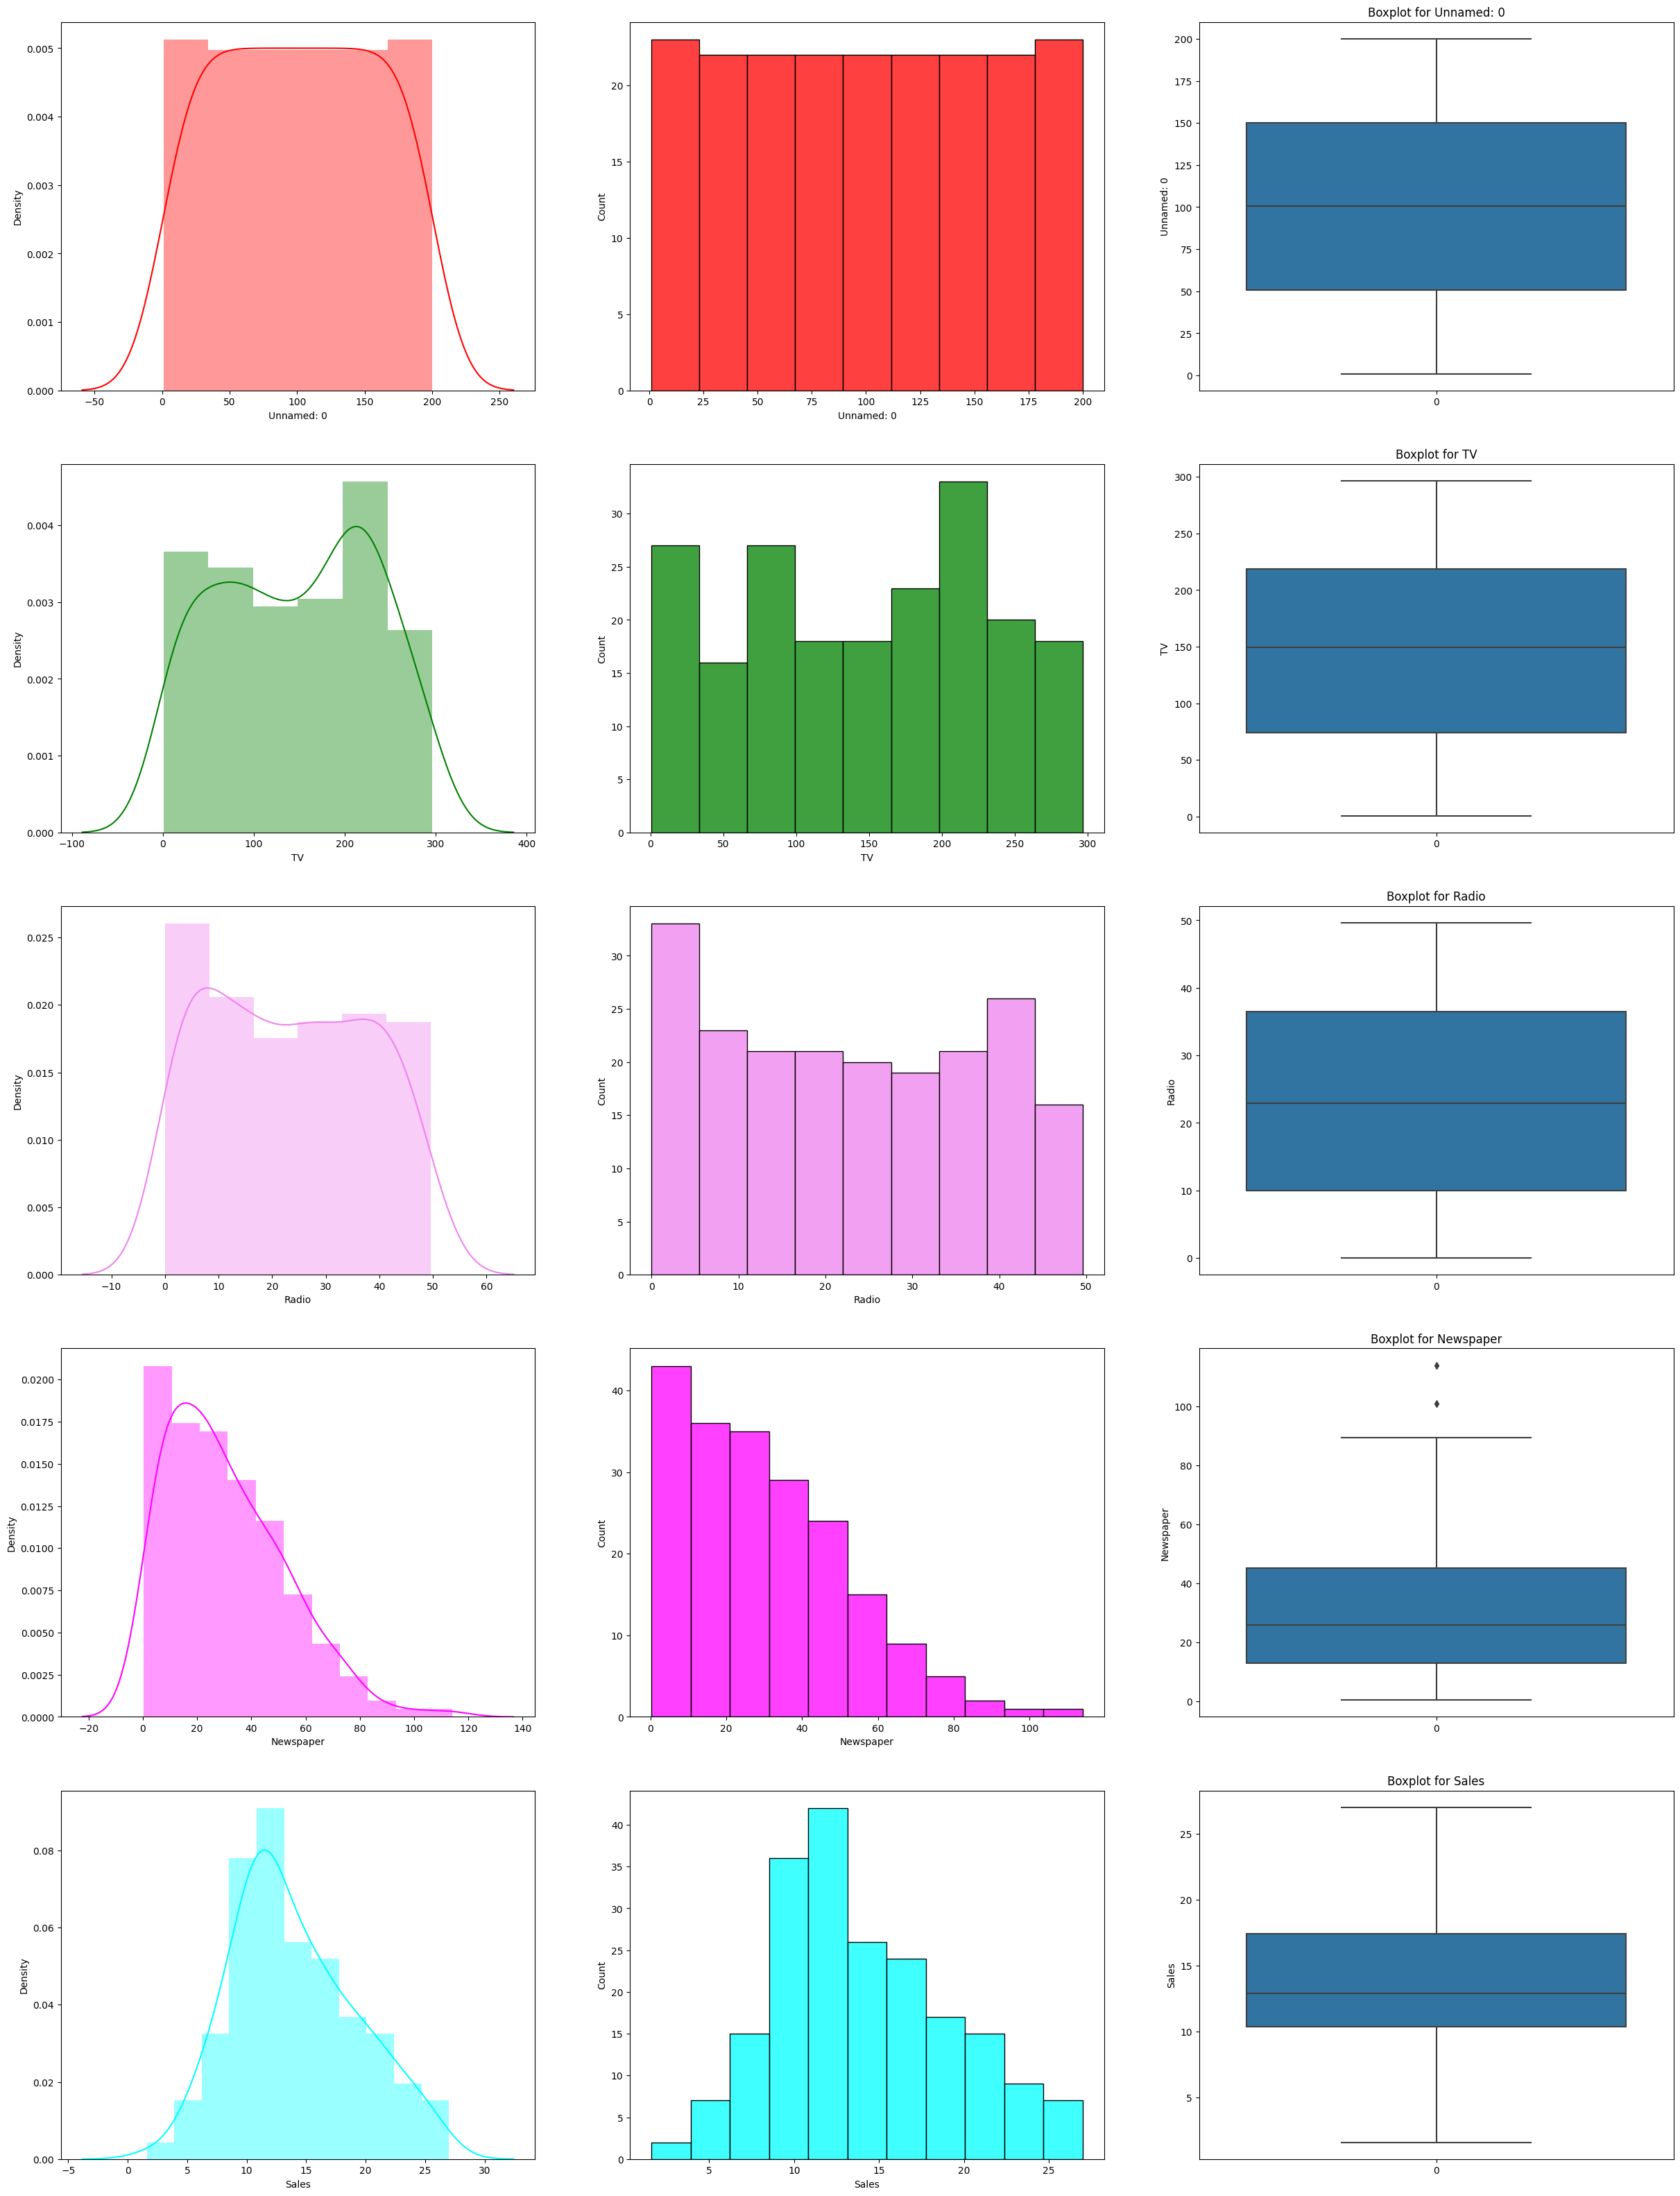

In [7]:
#Data Distribution

plt.figure(figsize = (30,40))
plt.tight_layout(pad = 2.0)

plt.subplot(5,3,1)
sns.distplot(raw_data['Unnamed: 0'],color = 'red')
plt.subplot(5,3,2)
sns.histplot(raw_data['Unnamed: 0'],color = 'red')
plt.subplot(5,3,3)
sns.boxplot(raw_data['Unnamed: 0'])
plt.ylabel('Unnamed: 0')
plt.title('Boxplot for Unnamed: 0')

plt.subplot(5,3,4)
sns.distplot(raw_data['TV'],color = 'green')
plt.subplot(5,3,5)
sns.histplot(raw_data['TV'],color = 'green')
plt.subplot(5,3,6)
sns.boxplot(raw_data['TV'])
plt.ylabel('TV')
plt.title('Boxplot for TV')

plt.subplot(5,3,7)
sns.distplot(raw_data['Radio'],color = 'violet')
plt.subplot(5,3,8)
sns.histplot(raw_data['Radio'],color = 'violet')
plt.subplot(5,3,9)
sns.boxplot(raw_data['Radio'])
plt.ylabel('Radio')
plt.title('Boxplot for Radio')

plt.subplot(5,3,10)
sns.distplot(raw_data['Newspaper'],color = 'magenta')
plt.subplot(5,3,11)
sns.histplot(raw_data['Newspaper'],color = 'magenta')
plt.subplot(5,3,12)
sns.boxplot(raw_data['Newspaper'])
plt.ylabel('Newspaper')
plt.title('Boxplot for Newspaper')

plt.subplot(5,3,13)
sns.distplot(raw_data['Sales'],color = 'cyan')
plt.subplot(5,3,14)
sns.histplot(raw_data['Sales'],color = 'cyan')
plt.subplot(5,3,15)
sns.boxplot(raw_data['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot for Sales')

<Axes: >

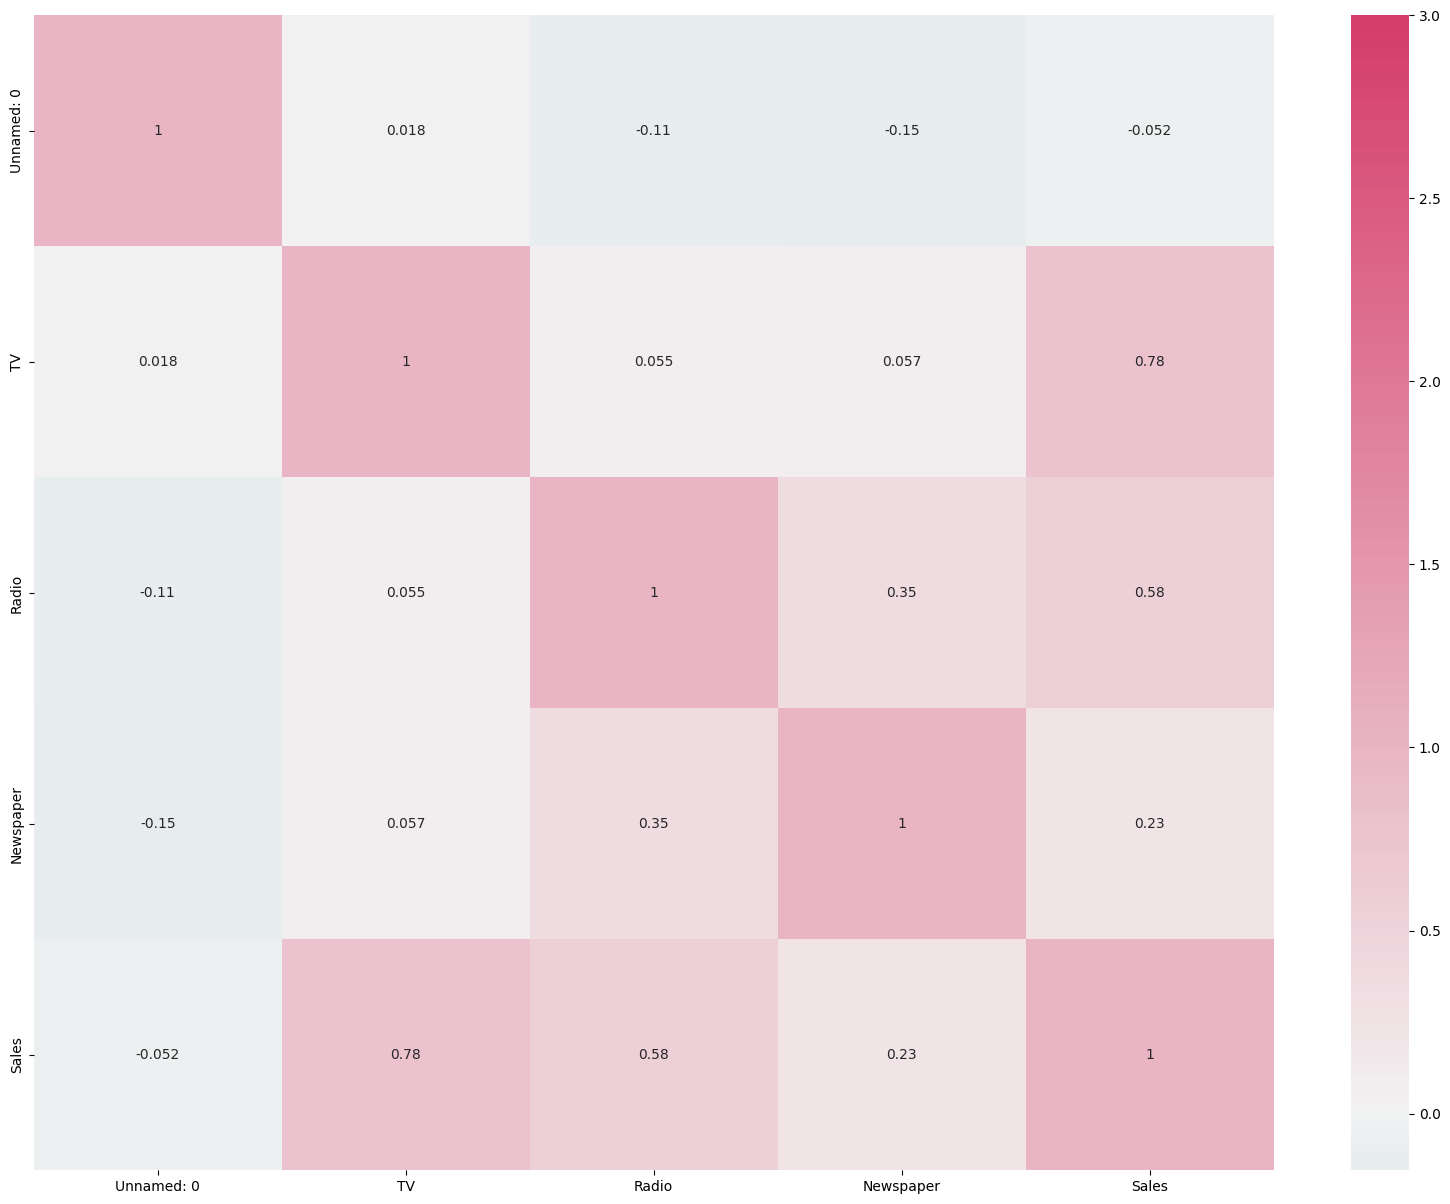

In [8]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (20,15))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(raw_data.iloc[:,:].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

<Figure size 3000x7000 with 0 Axes>

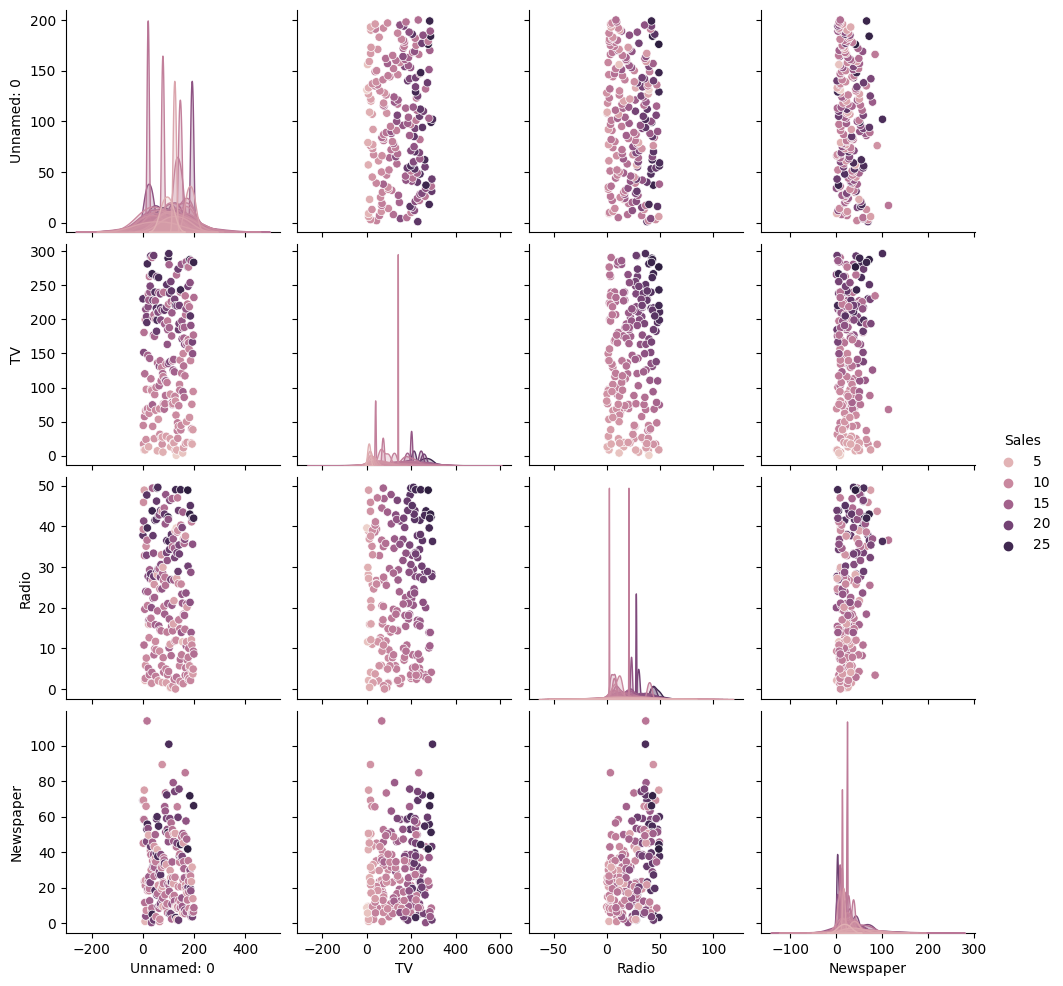

In [9]:
plt.figure(figsize = (30,70))
plt.tight_layout(pad = 3.0)
sns.pairplot(raw_data, hue = 'Sales')

#### DATA PREPROCESSING

In [10]:
sales_data = raw_data

### Dropping redundant Data
sales_data = sales_data.drop(['Unnamed: 0'], axis = 1)

### Scaling the TV Values
tv_scaler = MinMaxScaler()
sales_data['TV'] = tv_scaler.fit_transform(np.array(sales_data['TV']).reshape(-1,1))

### Scaling the Radio Values
radio_scaler = MinMaxScaler()
sales_data['Radio'] = radio_scaler.fit_transform(np.array(sales_data['Radio']).reshape(-1,1))

### Scaling the Newspaper Values
newspaper_scaler = MinMaxScaler()
sales_data['Newspaper'] = newspaper_scaler.fit_transform(np.array(sales_data['Newspaper']).reshape(-1,1))

### Scaling the Sales Values
sales_scaler = StandardScaler()
sales_data['Sales'] = sales_scaler.fit_transform(np.array(sales_data['Sales']).reshape(-1,1))

#### EXPLORATORY ANALYSIS OF THE PROCESSED DATA

Text(0.5, 1.0, 'Boxplot for Sales')

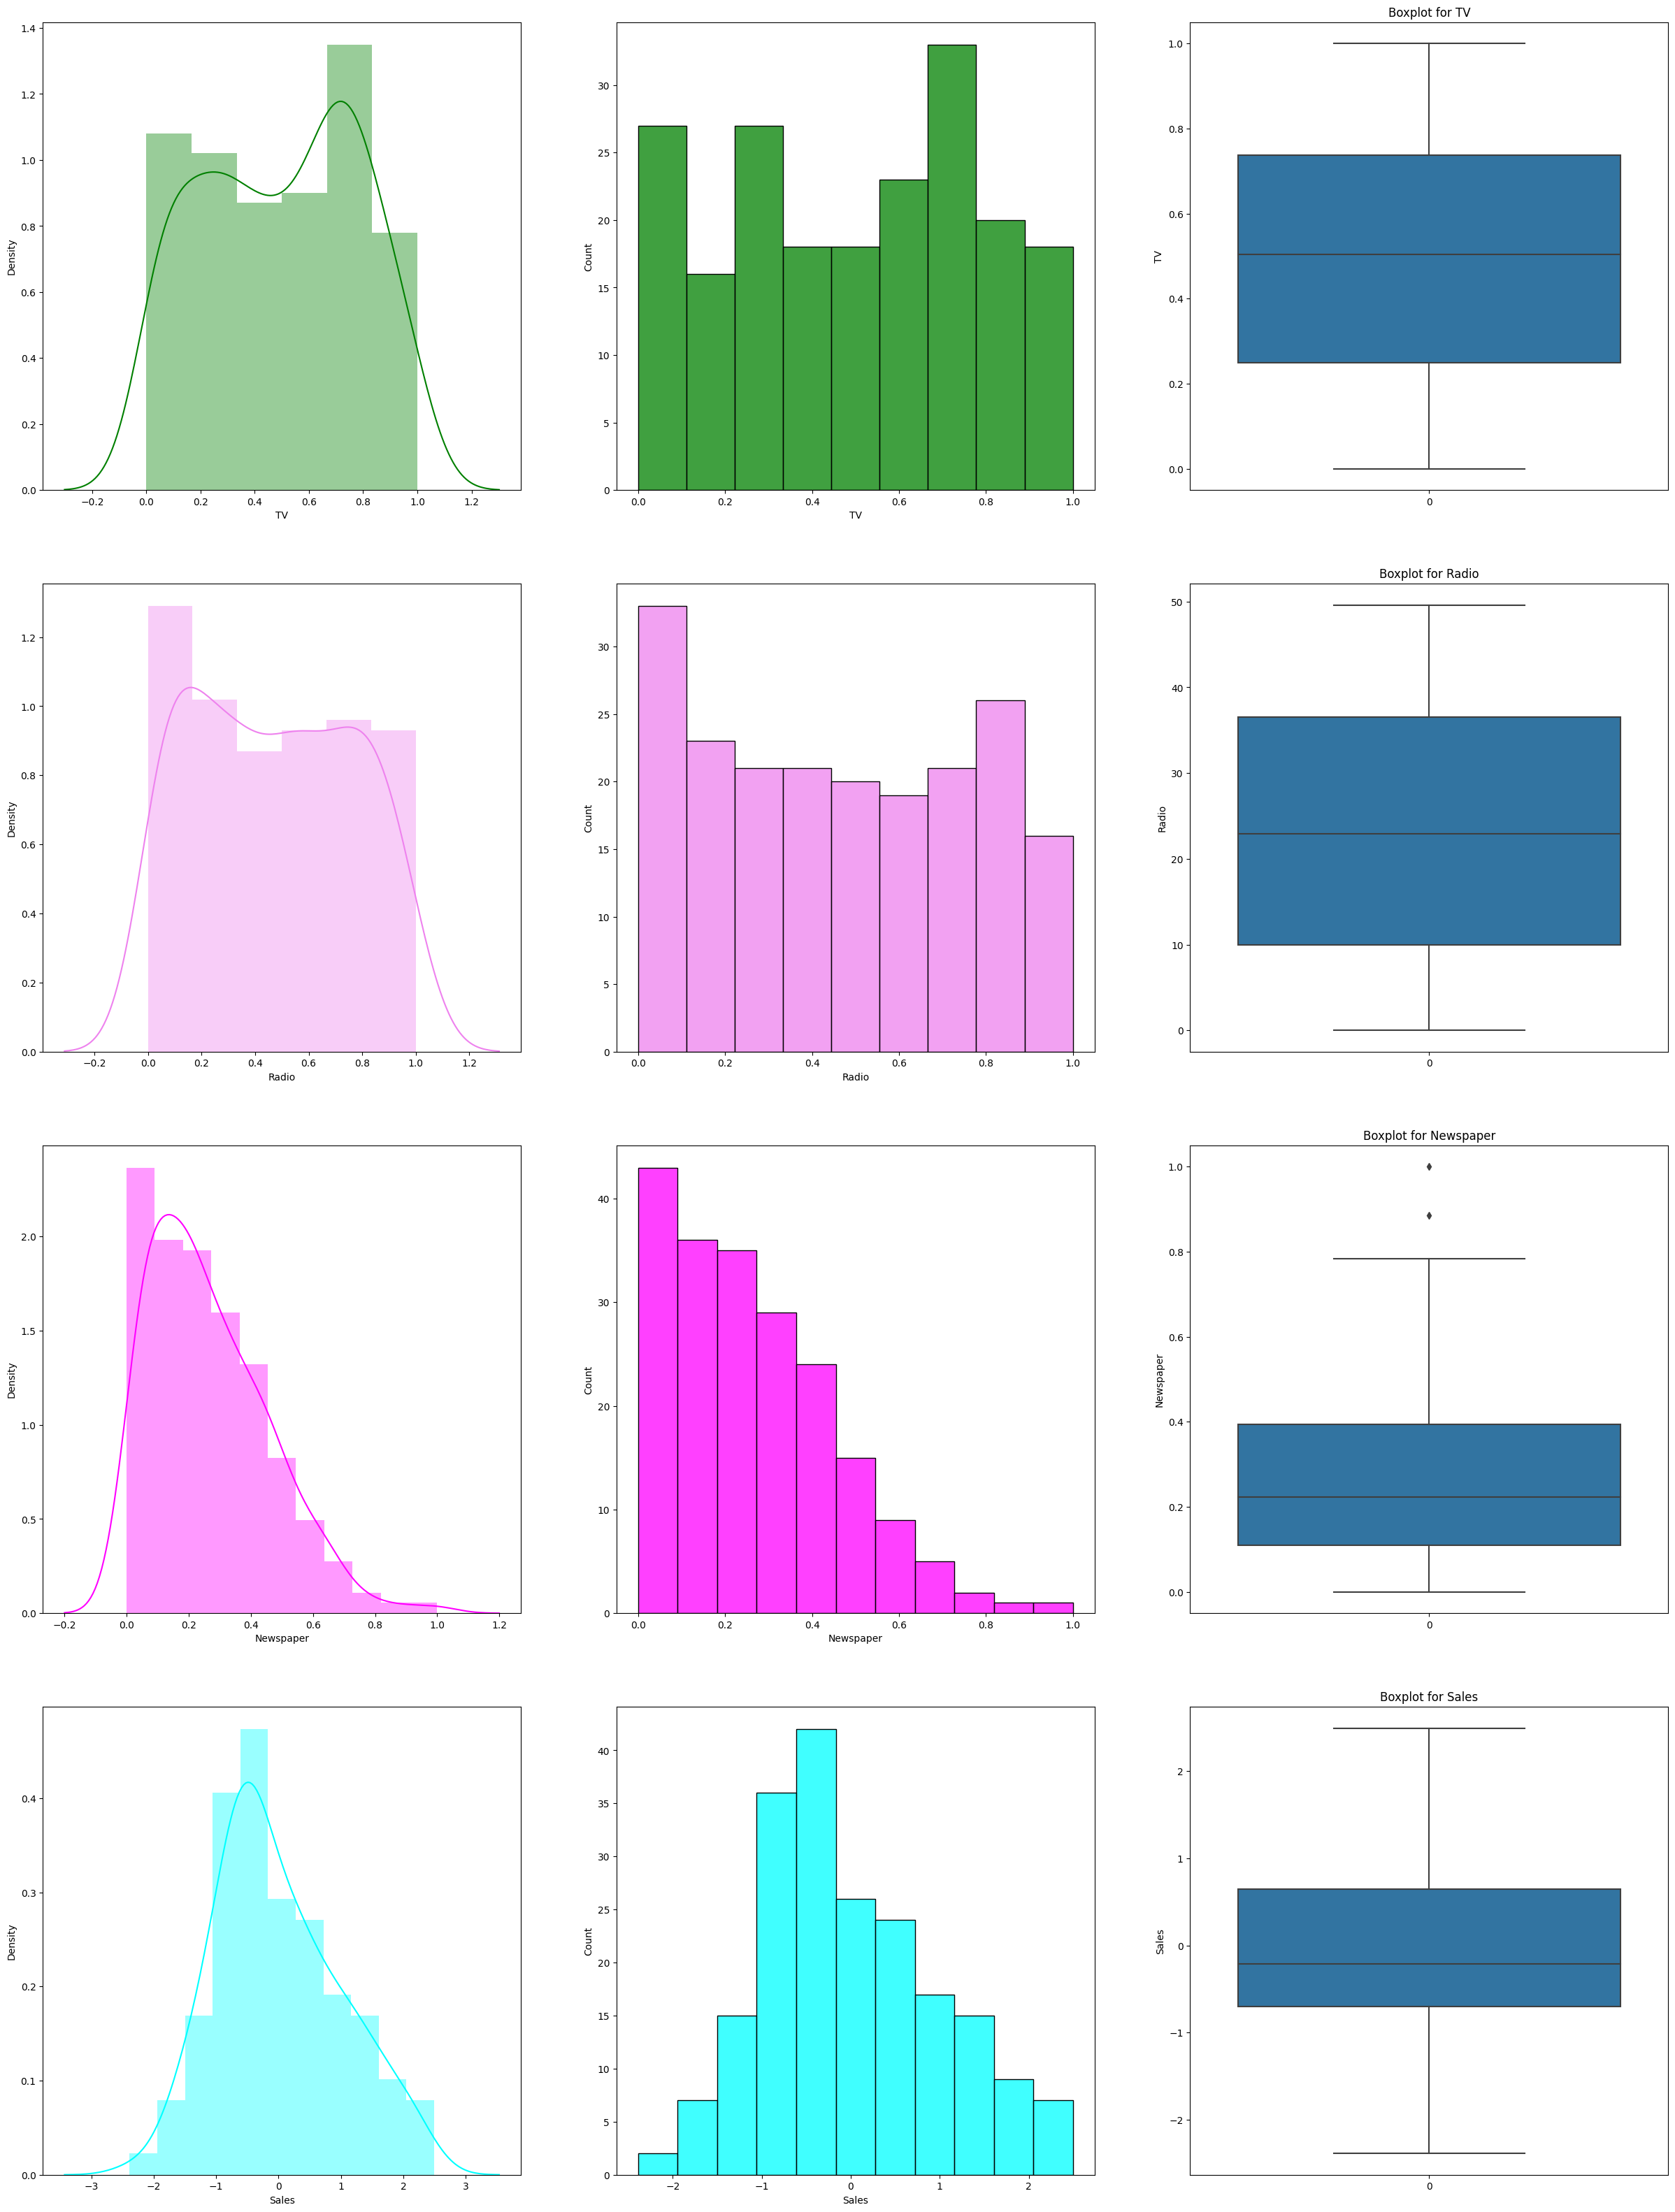

In [11]:
#Data Distribution

plt.figure(figsize = (30,40))
plt.tight_layout(pad = 2.0)

plt.subplot(4,3,1)
sns.distplot(sales_data['TV'],color = 'green')
plt.subplot(4,3,2)
sns.histplot(sales_data['TV'],color = 'green')
plt.subplot(4,3,3)
sns.boxplot(sales_data['TV'])
plt.ylabel('TV')
plt.title('Boxplot for TV')

plt.subplot(4,3,4)
sns.distplot(sales_data['Radio'],color = 'violet')
plt.subplot(4,3,5)
sns.histplot(sales_data['Radio'],color = 'violet')
plt.subplot(4,3,6)
sns.boxplot(raw_data['Radio'])
plt.ylabel('Radio')
plt.title('Boxplot for Radio')

plt.subplot(4,3,7)
sns.distplot(sales_data['Newspaper'],color = 'magenta')
plt.subplot(4,3,8)
sns.histplot(sales_data['Newspaper'],color = 'magenta')
plt.subplot(4,3,9)
sns.boxplot(sales_data['Newspaper'])
plt.ylabel('Newspaper')
plt.title('Boxplot for Newspaper')

plt.subplot(4,3,10)
sns.distplot(sales_data['Sales'],color = 'cyan')
plt.subplot(4,3,11)
sns.histplot(sales_data['Sales'],color = 'cyan')
plt.subplot(4,3,12)
sns.boxplot(sales_data['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot for Sales')

<Axes: >

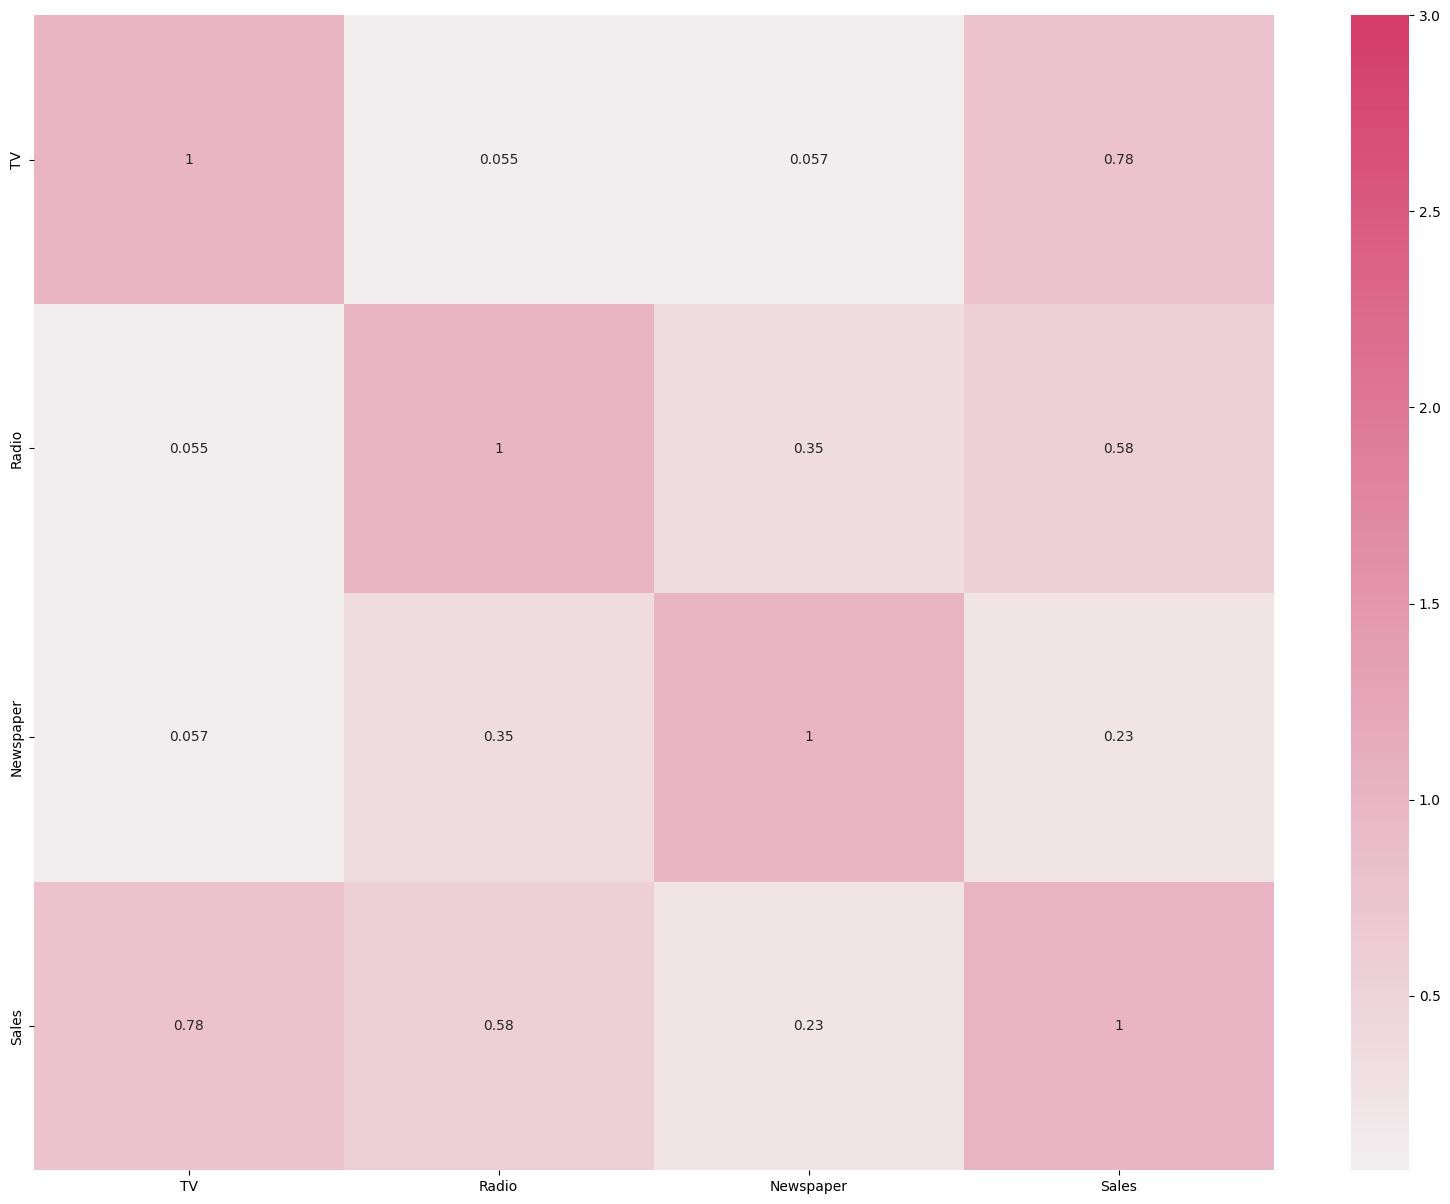

In [12]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (20,15))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(sales_data.iloc[:,:].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

<Figure size 3000x7000 with 0 Axes>

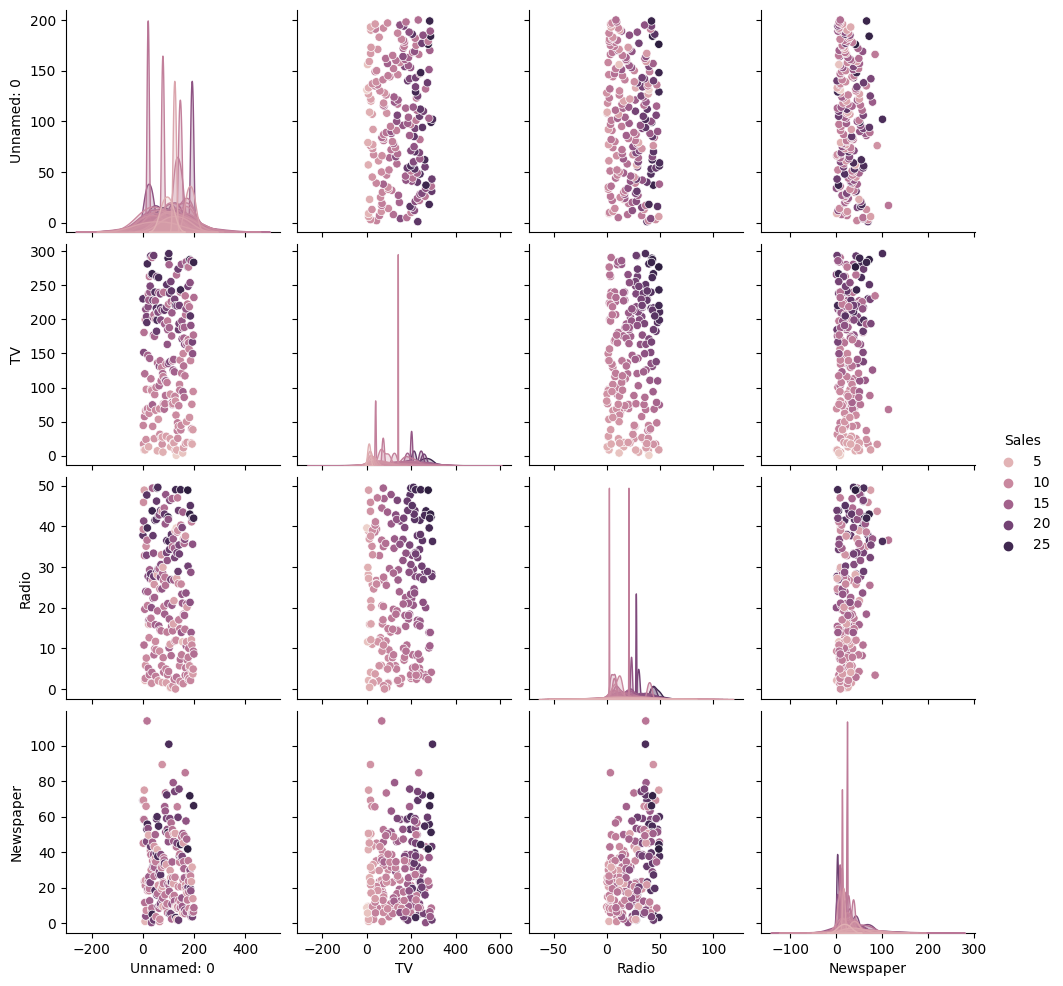

In [13]:
plt.figure(figsize = (30,70))
plt.tight_layout(pad = 3.0)
sns.pairplot(raw_data, hue = 'Sales')

#### SEPARATING THE FEATURES AND TARGETS

In [14]:
targets = np.array(sales_data['Sales'])
features_raw = sales_data
features_raw = features_raw.drop(['Sales'], axis = 1)
features = np.array(features_raw)

#### MODEL SELECTION AND HYPERPARAMETER TUNING

In [15]:
mae = []
mse =[]
r2 = []
regressor = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR()]
for i in range (7):
    for j in range (500):
        x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = j ,test_size = 0.2, shuffle = True)
        test_regressor = regressor[i]
        test_regressor.fit(x_train,y_train)
        y_predict = test_regressor.predict(x_test)
        mae.append(mean_absolute_error(y_test,y_predict))
        mse.append(mean_squared_error(y_test,y_predict))
        r2.append(r2_score(y_test,y_predict))
        print('Trial run '+str(i+1)+'.'+str(j)+' Regressor : ' + str(test_regressor) + ' completed : MAE =  '+str(mean_absolute_error(y_test,y_predict))+ ' MSE =  '+str(mean_squared_error(y_test,y_predict))+' R2 Score =  '+str(r2_score(y_test,y_predict)))

Trial run 1.0 Regressor : LinearRegression() completed : MAE =  0.2616597965923205 MSE =  0.16252528754908885 R2 Score =  0.8601145185017868
Trial run 1.1 Regressor : LinearRegression() completed : MAE =  0.19987243199696353 MSE =  0.07353999839228291 R2 Score =  0.8927605914615385
Trial run 1.2 Regressor : LinearRegression() completed : MAE =  0.316323808142612 MSE =  0.16625446901549862 R2 Score =  0.7575894500772727
Trial run 1.3 Regressor : LinearRegression() completed : MAE =  0.23032434827565423 MSE =  0.07951717794943572 R2 Score =  0.9138375011080567
Trial run 1.4 Regressor : LinearRegression() completed : MAE =  0.23278188783095968 MSE =  0.08185675435040948 R2 Score =  0.908577475231317
Trial run 1.5 Regressor : LinearRegression() completed : MAE =  0.24352366250146568 MSE =  0.09418108062670807 R2 Score =  0.8984204533332628
Trial run 1.6 Regressor : LinearRegression() completed : MAE =  0.20095400867865623 MSE =  0.06811924863923408 R2 Score =  0.922433347392203
Trial run 1

In [16]:
print('Lowest MAE Score = ' + str(min(mae)))
mae_location = int(mae.index(min(mae)))
mae_best_random_state = int(mae_location%500)
mae_regressor = str(regressor[int(mae_location//500)])
print ('Random State = ' + str(mae_best_random_state) + '  Regressor = ' + str(mae_regressor))

print('Lowest MSE Score = ' + str(min(mse)))
mse_location = int(mse.index(min(mse)))
mse_best_random_state = int(mse_location%500)
mse_regressor = str(regressor[int(mse_location//500)])
print ('Random State = ' + str(mse_best_random_state) + '  Regressor = ' + str(mse_regressor))

print('Best R2 Score = ' + str(max(r2)))
r2_location = int(r2.index(max(r2)))
r2_best_random_state = int(r2_location%500)
r2_regressor = str(regressor[int(r2_location//500)])
print ('Random State = ' + str(r2_best_random_state) + '  Regressor = ' + str(r2_regressor))

Lowest MAE Score = 0.05533480125326271
Random State = 331  Regressor = SVR()
Lowest MSE Score = 0.005051434746512357
Random State = 422  Regressor = SVR()
Best R2 Score = 0.995111705460733
Random State = 422  Regressor = SVR()


#### MODEL TRAINING

In [17]:
sales_predictor = (regressor[int(mae_location/500)])
x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = mae_best_random_state ,test_size = 0.15, shuffle = True)
sales_predictor.fit(x_train,y_train)

SVR()

#### MODEL EVALUATION

In [18]:
y_predicted = sales_predictor.predict(x_test)
y_predicted_rescaled = sales_scaler.inverse_transform(y_predicted.reshape(-1,1))
y_test_rescaled = sales_scaler.inverse_transform(y_test.reshape(-1,1))

In [19]:
real_values = np.array(np.round(y_test_rescaled, 2)).tolist()
predicted_values = np.array(np.round(y_predicted_rescaled, 2)).tolist()

df = pd.DataFrame({'Actual Item Outlet Sales': real_values, 'Predicted Outlet Item Sales': predicted_values})
print ('\n')
print(df.head(20))
print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe Mean Squared Error is : ' + str(mean_squared_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe R2 Score is : ' + str(r2_score (y_test_rescaled, y_predicted_rescaled)))



   Actual Item Outlet Sales Predicted Outlet Item Sales
0                    [12.4]                     [11.82]
1                    [10.3]                     [10.45]
2                     [9.3]                      [8.87]
3                    [10.4]                     [10.51]
4                    [18.4]                     [18.44]
5                    [16.7]                     [16.84]
6                    [21.2]                     [21.62]
7                    [22.6]                     [22.27]
8                    [10.6]                     [10.42]
9                     [9.7]                      [9.74]
10                    [8.1]                      [7.81]
11                    [8.0]                      [8.41]
12                   [10.7]                      [10.7]
13                   [22.3]                     [22.76]
14                   [22.2]                     [22.61]
15                    [9.6]                      [9.37]
16                   [15.5]                   

#### WHOLE CSV IMPLEMENTATION

In [20]:
targets_predicted = sales_predictor.predict(features)
targets_predicted_resacled = sales_scaler.inverse_transform(targets_predicted.reshape(-1,1))
predictions = (np.round(targets_predicted_resacled, 2)).tolist()
predicted_sales = pd.Series((predictions))

In [21]:
dataset_final = pd.concat([raw_data,predicted_sales],axis = 1)
dataset_final.columns.values[5] = 'Predicted_Sales'
dataset_final['Predicted_Sales'] = dataset_final['Predicted_Sales'].astype(str)
dataset_final.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted_Sales
0,1,230.1,37.8,69.2,22.1,[22.07]
1,2,44.5,39.3,45.1,10.4,[10.51]
2,3,17.2,45.9,69.3,9.3,[8.87]
3,4,151.5,41.3,58.5,18.5,[18.63]
4,5,180.8,10.8,58.4,12.9,[12.76]


In [22]:
dataset_final.head(25)

,Unnamed: 0,TV,Radio,Newspaper,Sales,Predicted_Sales
0,1,230.1,37.8,69.2,22.1,[22.07]
1,2,44.5,39.3,45.1,10.4,[10.51]
2,3,17.2,45.9,69.3,9.3,[8.87]
3,4,151.5,41.3,58.5,18.5,[18.63]
4,5,180.8,10.8,58.4,12.9,[12.76]
5,6,8.7,48.9,75.0,7.2,[8.74]
6,7,57.5,32.8,23.5,11.8,[11.12]
7,8,120.2,19.6,11.6,13.2,[13.26]
8,9,8.6,2.1,1.0,4.8,[6.26]
9,10,199.8,2.6,21.2,10.6,[11.12]


In [23]:
#saving the final train price data
dataset_final.to_csv('/kaggle/working/Processed_Data.csv', index = False)